# **Dimensionality reduction - Features selection**
Features selection is a technique for dimensionality reduction by the importance of the dataset features.
Bootstrapping aggregating is a technique that allows evaluating how useful is each variable to the predictions of the machine learning model.

In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

## Dataset
First, I'm going to import the dataset to test this technique.

It is a built-in dataset in the scikit-learn library. It is ideal to practice classification algorithms

Below, you can see a description of this dataset.

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

The dataset is split into features and a target variable

In [3]:
X, y = load_wine(return_X_y = True)
print(X.shape)
print(y.shape)

(178, 13)
(178,)


## Bagging 

I'm going to use the bagging method to combine the training of the many Decision Tree models.

In [4]:
# Instantiate a Decision Tree model
dt = DecisionTreeClassifier()

# Instantiate a bagging classifier with the previous decision tree
bagging = BaggingClassifier(dt, \
                            n_estimators=100, \
                            max_samples=0.6, \
                            max_features=1.0, \
                            bootstrap=True) 

# training the bagging tree
bagging.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.6,
                  n_estimators=100)

In [5]:
# average the importance of each feature
importances = np.mean( \
                   [tree.feature_importances_ for tree in bagging.estimators_], \
                   axis=0)

print(importances.shape)

(13,)


In [6]:
indices = np.argsort(importances)[::-1]
print('Feature ranking')
for i in range(X.shape[1]):
    print(f"{i+1}. Feature {indices[i]}: {round(importances[indices[i]], 2) * 100}")

Feature ranking
1. Feature 12: 31.0
2. Feature 6: 24.0
3. Feature 9: 17.0
4. Feature 11: 14.000000000000002
5. Feature 0: 6.0
6. Feature 10: 3.0
7. Feature 4: 1.0
8. Feature 1: 1.0
9. Feature 2: 1.0
10. Feature 5: 1.0
11. Feature 3: 1.0
12. Feature 8: 0.0
13. Feature 7: 0.0


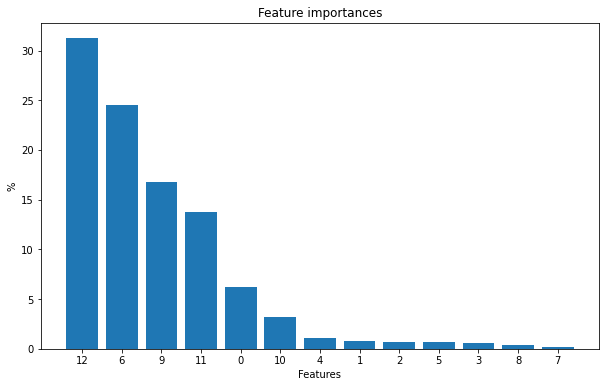

In [7]:
# plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices] * 100)
plt.xticks(range(X.shape[1]), indices)
plt.ylabel('%')
plt.xlabel('Features')
plt.show()

Finally, we can select the features, whose importance be greater than a specified threshold, and will be useful to train efficiently a machine learning model.

## Random forests

An improvement on the bagging model is the random forest model. In addition to sampling data points, this method also forces each baseline model to randomly select a subset of the features.
Below, I'm going to train a Random Forest model to select the most relevant features. Such features selection is made by SelectFromModel transformed from scikit-learn library.

In [8]:
# We have a dataset with 13 features
X.shape[1]

13

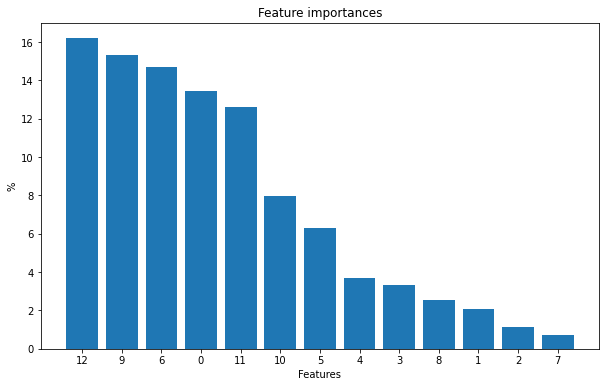

In [9]:
# instantiate the random forest model
tree = RandomForestClassifier(n_estimators=100)

# train the model
tree.fit(X, y)

# plot the feature importances
indices = np.argsort(tree.feature_importances_)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), tree.feature_importances_[indices] * 100)
plt.xticks(range(X.shape[1]), indices)
plt.ylabel('%')
plt.xlabel('Features')
plt.show()

In [10]:
# instantiate the transformer for features selection
fs = SelectFromModel(tree, prefit=True)

# get the most important features
X_fs = fs.transform(X)

# the number of the most important features is:
X_fs.shape[1]

6

In [11]:
# print the features selected
indices = np.argsort(fs.get_support())[::-1]
for i in indices:
    print(f'Feature {i}: {fs.get_support()[i]}')

Feature 12: True
Feature 11: True
Feature 10: True
Feature 9: True
Feature 6: True
Feature 0: True
Feature 8: False
Feature 7: False
Feature 5: False
Feature 4: False
Feature 3: False
Feature 2: False
Feature 1: False


## Boosting

Boosting algorithms are more robust than the Random forest models.

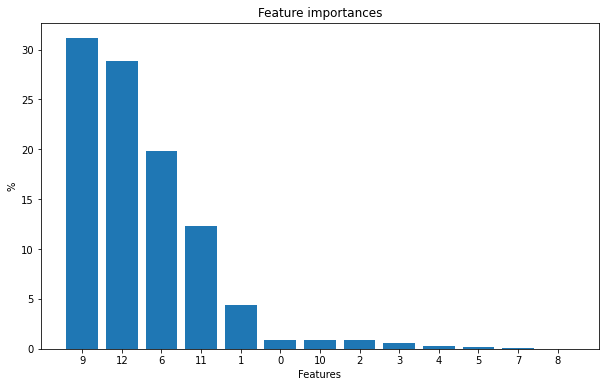

In [12]:
# instantiate the model
gb = GradientBoostingClassifier(n_estimators=100)

# train the model
gb.fit(X, y)

# plot the feature importances
indices = np.argsort(gb.feature_importances_)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), gb.feature_importances_[indices] * 100)
plt.xticks(range(X.shape[1]), indices)
plt.ylabel('%')
plt.xlabel('Features')
plt.show()

In [13]:
# instantiate the transformer for features selection
fs = SelectFromModel(gb, prefit=True)

# get the most important features
X_fs = fs.transform(X)

# the number of the most important features is:
X_fs.shape[1]

4

In [14]:
# print the features selected
indices = np.argsort(fs.get_support())[::-1]
for i in indices:
    print(f'Feature {i}: {fs.get_support()[i]}')

Feature 12: True
Feature 11: True
Feature 9: True
Feature 6: True
Feature 10: False
Feature 8: False
Feature 7: False
Feature 5: False
Feature 4: False
Feature 3: False
Feature 2: False
Feature 1: False
Feature 0: False
